In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [2]:
cust = pd.read_csv("E:\Python Case Study\Python Foundation Case Study 1 - Retail Case Study (3)\Customer.csv")


In [3]:
cust

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
Tran = pd.read_csv("E:\Python Case Study\Python Foundation Case Study 1 - Retail Case Study (3)\Transactions.csv")

In [5]:
Tran

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [6]:
prod = pd.read_csv("E:\Python Case Study\Python Foundation Case Study 1 - Retail Case Study (3)\prod_cat_info.csv")
prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


### EDA

In [7]:
cust.shape

(5647, 4)

In [8]:
Tran.shape

(23053, 10)

In [9]:
prod.shape

(23, 4)

In [10]:
prod.rename(columns ={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [11]:
prod

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [12]:
cust.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [13]:
Tran.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [14]:
prod.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


### Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [15]:
prod_concat = pd.merge(left =Tran, right = prod ,on= ['prod_cat_code','prod_subcat_code'],how = "left")

In [16]:
prod_concat

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [17]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

### Merge customer and prod_concat

In [18]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [19]:
customer_final = pd.merge(left= prod_concat, right =cust, right_on= "customer_Id", left_on ="cust_id", how ="left")

In [43]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [21]:
customer_final.shape

(23053, 16)

In [22]:
Tran.shape

(23053, 10)

In [23]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [24]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [25]:
customer_final["DOB"] =pd.to_datetime(customer_final["DOB"], format ="%d-%m-%Y")

In [26]:
customer_final["DOB"].head(10)

0   1981-09-26
1   1973-05-11
2   1992-07-27
3   1981-06-08
4   1992-07-27
5   1982-10-09
6   1981-05-29
7   1971-04-21
8   1971-11-04
9   1979-11-27
Name: DOB, dtype: datetime64[ns]

In [27]:
customer_final["tran_date"] =pd.to_datetime(customer_final["tran_date"])

C:\Users\user\AppData\Local\Temp\ipykernel_2524\140837638.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final["tran_date"] =pd.to_datetime(customer_final["tran_date"])


In [28]:
customer_final["tran_date"].head(10)

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
5   2014-02-23
6   2014-02-22
7   2014-02-22
8   2014-02-22
9   2014-02-21
Name: tran_date, dtype: datetime64[ns]

### checking for duplicates

In [29]:
customer_final.duplicated().sum()

13

In [30]:
customer_final.drop_duplicates(inplace= True)

In [31]:
customer_final.duplicated().sum()

0

### 2. Prepare a summary report for the merged data set. 
 a. Get the column names and their corresponding data types


In [32]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [33]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

### b. Top/Bottom 10 observations

In [34]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [35]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


###  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [36]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


### d. Frequency tables for all the categorical variables

In [37]:
customer_final.loc[:,customer_final.dtypes == "object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.
Histogram for all continuous variables

In [38]:
conti_customer = customer_final.loc[:,["prod_subcat_code","prod_cat_code","Qty","Rate","Tax","total_amt",]]

In [39]:
conti_customer.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

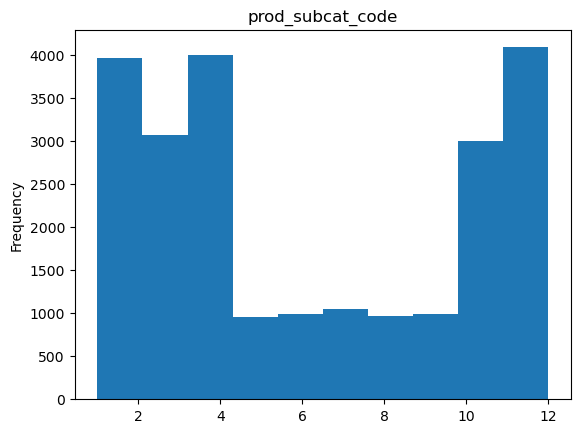

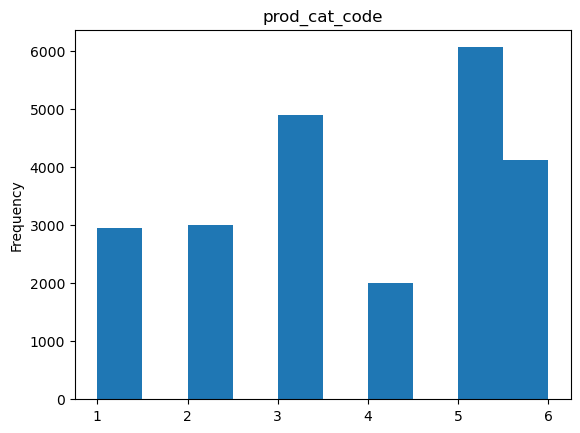

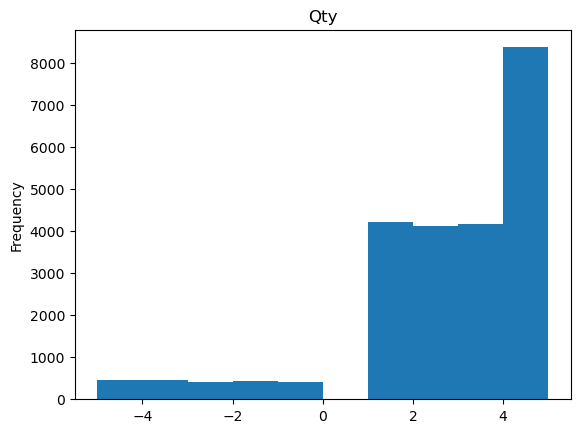

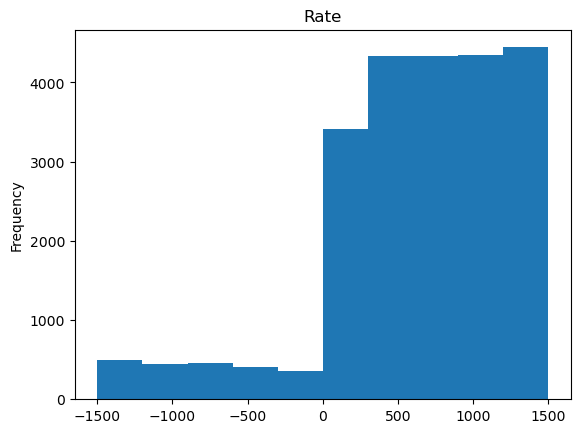

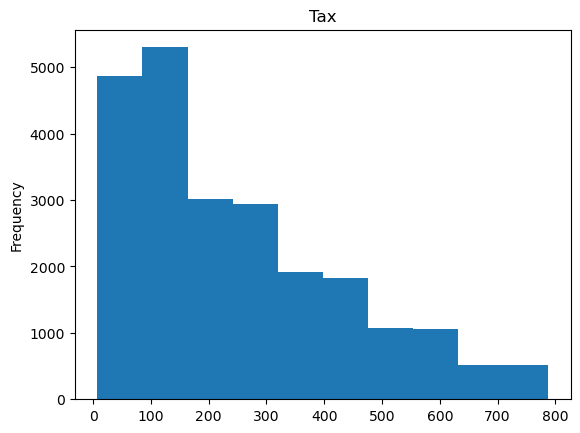

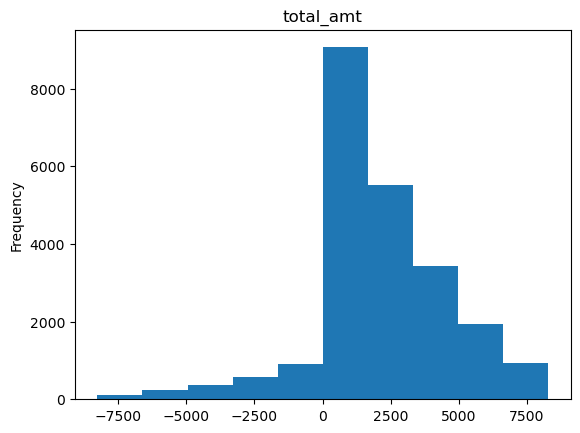

In [40]:
for i in conti_customer.columns:
    conti_customer[i].plot(kind="hist")
    #plt.figure(figsize =(5,5))
    plt.title(i)
    plt.show()

### Bars charts for categorical variables

In [47]:
category_customer = customer_final.loc[:,customer_final.dtypes == "object"]
category_customer.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


In [ ]:
plt.figure(figsize= (3,3))
sns.countplot(category_customer["Gender"])
plt.show()

In [ ]:
plt.figure(figsize =(5,5))
sns.countplot(category_customer["Store_type"])
plt.xlabel("Store Type")
plt.show()

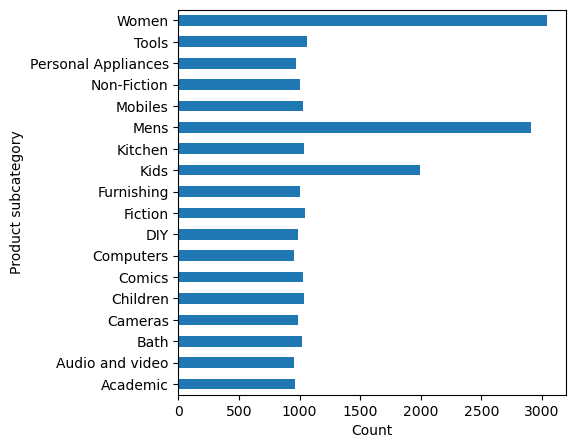

In [50]:
plt.figure(figsize =(5,5))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product subcategory')
plt.show()

### 4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data

In [51]:
customer_final.sort_values(by= 'tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-11-08,M,4.0


In [52]:
max_date = customer_final['tran_date'].max()

In [53]:
min_date = customer_final["tran_date"].min()

In [54]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format = "%d-%m-%Y") +" to "+ pd.Timestamp.strftime(max_date,format = "%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


###  b. Count of transactions where the total amount of transaction was negative

In [ ]:
customer_final.head()

In [ ]:
negative_transaction = customer_final.loc[customer_final['total_amt'] < 0, "transaction_id"].count()

In [ ]:
#negative_transaction

In [ ]:
print("Count of transactions where the total amount of transaction was negative is", negative_transaction)

### 5. Analyze which product categories are more popular among females vs male customers.


In [ ]:
customer_final.head(2)

In [ ]:
product_gender = customer_final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

In [ ]:
product_gender

In [ ]:
#for better view
product_gender.pivot(index = "Gender",columns = 'prod_cat', values = 'Qty')

#### Analyze
#Products that are popular among males are: 1-Books 2-clothing 3-Electronics 4-Home and kitchen

#Products that are popular among males are: 1-Bags 2-Footwear

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [ ]:
customer_final.head(2)

In [ ]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending = False)

In [ ]:
customer_group

In [ ]:
plt.figure(figsize=(5,3))
customer_group.plot(kind='bar')
plt.xlabel('city code')
plt.ylabel('No of customer')
plt.show()


In [ ]:
percentage = round((customer_group[4.0] / customer_group.sum())*100)

In [ ]:
percentage

In [ ]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)

### 7. Which store type sells the maximum products by value and by quantity?

In [ ]:
customer_final.head(2)

In [ ]:
Store = customer_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty', ascending = False)

In [ ]:
Store

In [ ]:
print("e-shop store type sells the maximum products by value and by quantity")

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [ ]:
customer_final.head(2)

In [ ]:
store = round(customer_final.pivot_table(index ='prod_cat', columns = 'Store_type', values ='total_amt',aggfunc= 'sum'),2)

In [ ]:
store

In [ ]:
store.loc[['Clothing','Electronics'],'Flagship store']

In [ ]:
store.loc [['Clothing','Electronics'],'Flagship store'].sum()

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [ ]:
customer_final.head(2)

In [ ]:
Gender_grp = round(customer_final.pivot_table(index= 'prod_cat', columns= 'Gender',values= 'total_amt',aggfunc='sum'),2)

In [ ]:
Gender_grp

In [ ]:
Male_Earn = Gender_grp.loc['Electronics','M'] 

In [ ]:
Male_Earn

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [ ]:
customer_final.head(2)

In [ ]:
pos_tran = customer_final.loc[customer_final['total_amt']>0,:]

In [ ]:
pos_tran.head()

In [ ]:
# creating a dataframe that contains unique transactions 
unique_tran = pos_tran.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [ ]:
unique_tran

In [ ]:
#now finding the customers which have unique transactions greater than 10
unique_tran_count = unique_tran.groupby('customer_Id')['transaction_id'].count().reset_index()

In [ ]:
unique_tran_count.head()

In [ ]:
unique_tran_count[unique_tran_count['transaction_id']>10]

In [ ]:
print('There are no unique transactions greater than 10')

### 11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?

In [ ]:
# Adding new column Age

now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'],format = '%m%d%y')
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))  
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [ ]:
customer_final.head()

In [ ]:
#creating new column age category for aged between 25-35
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [ ]:
customer_final.head()

In [ ]:
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [ ]:
customer_25_35

In [ ]:
customer_25_35.loc['25-35',['Books','Electronics']]

In [ ]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [ ]:
customer_final.head()

In [ ]:
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']

In [ ]:
customer_total_amount_25_35.head()

In [ ]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [ ]:
total_amount.head()

In [ ]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())